Run this for google Colab

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset_P1.zip to Dataset_P1.zip
User uploaded file "Dataset_P1.zip" with length 246963 bytes


In [2]:
!unzip "Dataset_P1.zip"

Archive:  Dataset_P1.zip
   creating: Dataset_P1/Query/
  inflating: Dataset_P1/Query/Q1.jpg  
  inflating: Dataset_P1/Query/Q2.jpg  
  inflating: Dataset_P1/Query/Q3.jpg  
  inflating: Dataset_P1/Query/Q4.jpg  
   creating: Dataset_P1/train/
  inflating: Dataset_P1/train/113003.jpg  
  inflating: Dataset_P1/train/113016.jpg  
  inflating: Dataset_P1/train/113025.jpg  
  inflating: Dataset_P1/train/113034.jpg  
  inflating: Dataset_P1/train/113038.jpg  
  inflating: Dataset_P1/train/113043.jpg  
  inflating: Dataset_P1/train/113044.jpg  
  inflating: Dataset_P1/train/113047.jpg  
  inflating: Dataset_P1/train/113058.jpg  
  inflating: Dataset_P1/train/113060.jpg  
  inflating: Dataset_P1/train/113064.jpg  
  inflating: Dataset_P1/train/113083.jpg  
  inflating: Dataset_P1/train/113088.jpg  
  inflating: Dataset_P1/train/113089.jpg  
  inflating: Dataset_P1/train/113090.jpg  
  inflating: Dataset_P1/train/443000.jpg  
  inflating: Dataset_P1/train/443005.jpg  
  inflating: Dataset_P1/tr

Using OpenCv 3.4.2.16

In [3]:
pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [4]:
pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 153kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [5]:
import argparse as ap
import cv2
import numpy as np
import os
import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing

from pylab import *

Training And Extracting Feature

In [6]:
train_path = "/content/Dataset_P1/train"

training_names = os.listdir(train_path)

numWords = 2000

#
image_paths = []
for training_name in training_names:
    image_path = os.path.join(train_path, training_name)
    image_paths += [image_path]


des_list = []


for i, image_path in enumerate(image_paths):
    im = cv2.imread(image_path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    print ("Extract SIFT of %s image, %d of %d images" %(training_names[i], i, len(image_paths)))
    
    sift = cv2.xfeatures2d.SIFT_create()
    (kps, des) = sift.detectAndCompute(im, None)
 
    des_list.append((image_path, des))   
    


# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

# Perform k-means clustering
print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
voc, variance = kmeans(descriptors, numWords, 1) 

# Calculate the histogram of features
im_features = np.zeros((len(image_paths), numWords), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

print ("Features =", im_features)
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Perform L2 normalization
im_features = im_features*idf
im_features = preprocessing.normalize(im_features, norm='l2')      
joblib.dump((im_features, image_paths, idf, numWords, voc), "images.pkl", compress=3)   

Extract SIFT of 84021.jpg image, 0 of 75 images
Extract SIFT of 443026.jpg image, 1 of 75 images
Extract SIFT of 644000.jpg image, 2 of 75 images
Extract SIFT of 113090.jpg image, 3 of 75 images
Extract SIFT of 443036.jpg image, 4 of 75 images
Extract SIFT of 113060.jpg image, 5 of 75 images
Extract SIFT of 581016.jpg image, 6 of 75 images
Extract SIFT of 84009.jpg image, 7 of 75 images
Extract SIFT of 84028.jpg image, 8 of 75 images
Extract SIFT of 84025.jpg image, 9 of 75 images
Extract SIFT of 443035.jpg image, 10 of 75 images
Extract SIFT of 644001.jpg image, 11 of 75 images
Extract SIFT of 113025.jpg image, 12 of 75 images
Extract SIFT of 84027.jpg image, 13 of 75 images
Extract SIFT of 84017.jpg image, 14 of 75 images
Extract SIFT of 644014.jpg image, 15 of 75 images
Extract SIFT of 581042.jpg image, 16 of 75 images
Extract SIFT of 644003.jpg image, 17 of 75 images
Extract SIFT of 443017.jpg image, 18 of 75 images
Extract SIFT of 581006.jpg image, 19 of 75 images
Extract SIFT of 

['images.pkl']

In [7]:
from pylab import *

Extract Feature From Q1

/content/Dataset_P1/Query/Q1.jpg
Ranking =  [[47 70 51 66 28 36 20 41 29 15 71  5 19 17 62 56 12  1  6 13 59 16  8 45
  42 21 18 57  7 53 46 74  2 67 10 55 11 44 22  4 65 32 43 25 63  9 39 72
  60  3 61 54 34 30 68 58 52 38  0 26 40 49 69 23 24 33 50 31 14 37 35 48
  73 64 27]]
0.01322998
index = 0 ID = 47
index = 1 ID = 70
index = 2 ID = 51
index = 3 ID = 66
index = 4 ID = 28
index = 5 ID = 36
index = 6 ID = 20
index = 7 ID = 41
index = 8 ID = 29
index = 9 ID = 15
index = 10 ID = 71
index = 11 ID = 5
index = 12 ID = 19
index = 13 ID = 17
index = 14 ID = 62


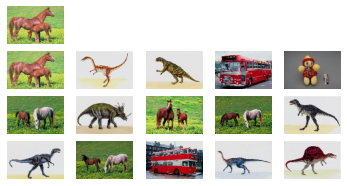

In [8]:
image_path = "/content/Dataset_P1/Query/Q1.jpg"
print (image_path)

# Load the classifier, class names, scaler, number of clusters and vocabulary 
im_features, image_paths, idf, numWords, voc = joblib.load("images.pkl")


des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(im, None)

des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])

# Visualize the results
figure()

subplot(5,5,1)
imshow(im[:,:,::-1])
axis('off')

for i, ID in enumerate(rank_ID[0][0:15]):
  im = cv2.imread(image_paths[ID])
  print ("index =", i, "ID =",ID)
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  subplot(5,5,i+6)
  imshow(img)
  axis('off')
show()  


Creating Array Result Of 1 for Q1 image result(Horse) and 0 for the other object

In [9]:
result=[]
for path in image_paths:
  if("113" in path):
    result.append(1)
  else:
    result.append(0)

Using Cosine Similariy and Precision Recall Curve to get Precision and recall Curve


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(test_features, im_features)

In [11]:
sim

array([[0.01442546, 0.03807881, 0.02810774, 0.0177763 , 0.02505422,
        0.05362135, 0.03694447, 0.02973368, 0.03392758, 0.0209865 ,
        0.0279439 , 0.02764184, 0.03946532, 0.03685162, 0.0078104 ,
        0.05758855, 0.0344321 , 0.05116824, 0.03059566, 0.05230241,
        0.07040668, 0.03061635, 0.02571854, 0.01200187, 0.01101547,
        0.0223873 , 0.01389633, 0.        , 0.07382181, 0.06016695,
        0.01604159, 0.00796416, 0.02486045, 0.00977752, 0.01614543,
        0.00487782, 0.07076058, 0.00696603, 0.01458379, 0.02051543,
        0.01374972, 0.0661596 , 0.03315167, 0.02255514, 0.02662306,
        0.03379759, 0.02881892, 1.        , 0.        , 0.01322998,
        0.00819389, 0.0869564 , 0.0147127 , 0.02940777, 0.01646785,
        0.02782728, 0.04132962, 0.02985638, 0.01510745, 0.03665835,
        0.01788464, 0.01666374, 0.04168786, 0.02128065, 0.        ,
        0.02492758, 0.08070805, 0.02798115, 0.01574303, 0.01216104,
        0.12445312, 0.05625515, 0.01856731, 0.  

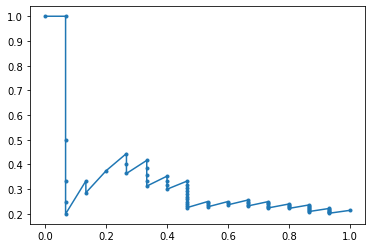

In [12]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(result, sim[0])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

Extract Feature From Q2


/content/Dataset_P1/Query/Q2.jpg
Ranking =  [[ 0 37 35 41 14 29  6 44 25 56 65 23  3 54 73 74 33 52  8 27 68 16 32 21
  66 17 19 58 36 20 71 69 61 43 47 64  4  1 12 53 42 34 31 40 22 59 67 63
  62 57 72 55 60 70  2 50  5  7  9 10 11 13 15 18 24 26 28 30 39 45 46 48
  49 51 38]]
0.0
index = 0 ID = 0
index = 1 ID = 37
index = 2 ID = 35
index = 3 ID = 41
index = 4 ID = 14
index = 5 ID = 29
index = 6 ID = 6
index = 7 ID = 44
index = 8 ID = 25
index = 9 ID = 56
index = 10 ID = 65
index = 11 ID = 23
index = 12 ID = 3
index = 13 ID = 54
index = 14 ID = 73


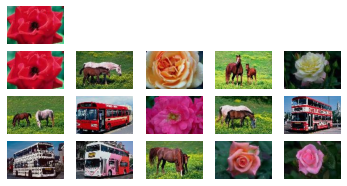

In [13]:
image_path = "/content/Dataset_P1/Query/Q2.jpg"
print (image_path)

# Load the classifier, class names, scaler, number of clusters and vocabulary 
im_features, image_paths, idf, numWords, voc = joblib.load("images.pkl")


des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(im, None)

des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])

# Visualize the results
figure()

subplot(5,5,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:15]):
     im = cv2.imread(image_paths[ID])
     print ("index =", i, "ID =",ID)
     img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     subplot(5,5,i+6)
     imshow(img)
     axis('off')
show()  


In [14]:
result=[]
for path in image_paths:
  if("840" in path):
    result.append(1)
  else:
    result.append(0)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(test_features, im_features)

In [16]:
sim

array([[1.0000001 , 0.01299122, 0.        , 0.0359197 , 0.01333524,
        0.        , 0.04168085, 0.        , 0.03018373, 0.        ,
        0.        , 0.        , 0.01294005, 0.        , 0.04233176,
        0.        , 0.02416403, 0.02008443, 0.        , 0.0194619 ,
        0.01729217, 0.02146686, 0.008948  , 0.03692124, 0.        ,
        0.04147695, 0.        , 0.0295574 , 0.        , 0.0418427 ,
        0.        , 0.00945617, 0.02300483, 0.03194752, 0.0095021 ,
        0.05010274, 0.01789087, 0.07884534, 0.        , 0.        ,
        0.00923394, 0.04570126, 0.01046643, 0.01489385, 0.04156537,
        0.        , 0.        , 0.01442546, 0.        , 0.        ,
        0.        , 0.        , 0.03149481, 0.01172874, 0.03284916,
        0.        , 0.03715478, 0.        , 0.01850465, 0.00830202,
        0.        , 0.0153808 , 0.        , 0.        , 0.01352857,
        0.03699301, 0.02086398, 0.        , 0.02602416, 0.01618693,
        0.        , 0.01681998, 0.        , 0.03

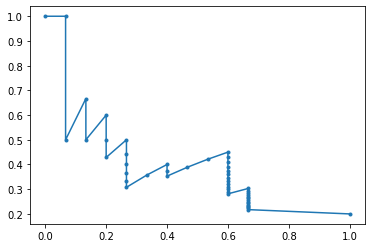

In [17]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(result, sim[0])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

Extract Feature From Q3

/content/Dataset_P1/Query/Q3.jpg
Ranking =  [[71 43 62 20 15 34 11 74 24 53 47 17 60 69 31 16 51  5 44 10 72 35 38  2
  22 61  7  9 13 68 70 19 12 30 42 52  0 28 36  3 27 23 41 54 14 58 32 65
  45 73  6 63 48 49 21 40 50  8 67  4 66  1 64 55 59 57 56 25 26 46 29 39
  33 18 37]]
0.009566697
index = 0 ID = 71
index = 1 ID = 43
index = 2 ID = 62
index = 3 ID = 20
index = 4 ID = 15
index = 5 ID = 34
index = 6 ID = 11
index = 7 ID = 74
index = 8 ID = 24
index = 9 ID = 53
index = 10 ID = 47
index = 11 ID = 17
index = 12 ID = 60
index = 13 ID = 69
index = 14 ID = 31


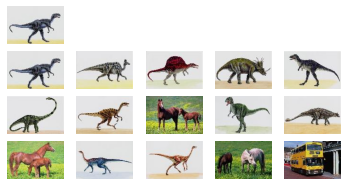

In [18]:
image_path = "/content/Dataset_P1/Query/Q3.jpg"
print (image_path)

# Load the classifier, class names, scaler, number of clusters and vocabulary 
im_features, image_paths, idf, numWords, voc = joblib.load("images.pkl")


des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(im, None)

des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])

# Visualize the results
figure()

subplot(5,5,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:15]):
     im = cv2.imread(image_paths[ID])
     print ("index =", i, "ID =",ID)
     img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     subplot(5,5,i+6)
     imshow(img)
     axis('off')
show()  


In [19]:
result=[]
for path in image_paths:
  if("644" in path):
    result.append(1)
  else:
    result.append(0)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(test_features, im_features)

In [21]:
sim

array([[0.01681998, 0.        , 0.02481503, 0.01613297, 0.        ,
        0.03157246, 0.01082684, 0.022622  , 0.        , 0.02132571,
        0.02724854, 0.07444012, 0.02049563, 0.02118267, 0.0131066 ,
        0.08417104, 0.03487802, 0.04488955, 0.        , 0.02051705,
        0.10928179, 0.00857636, 0.02473396, 0.01560195, 0.06150987,
        0.        , 0.        , 0.0157633 , 0.01659604, 0.        ,
        0.0196407 , 0.03966644, 0.01248509, 0.        , 0.07993704,
        0.02557486, 0.01658747, 0.        , 0.02519652, 0.        ,
        0.0056236 , 0.01490416, 0.01940786, 0.15994841, 0.03022169,
        0.01104095, 0.        , 0.05625515, 0.01006664, 0.0095667 ,
        0.00506103, 0.03415551, 0.0192319 , 0.05878673, 0.01335112,
        0.        , 0.        , 0.        , 0.01307653, 0.        ,
        0.04456679, 0.02465071, 0.11621806, 0.01081171, 0.        ,
        0.01193785, 0.        , 0.        , 0.02100345, 0.0425549 ,
        0.02081725, 1.0000001 , 0.02661413, 0.01

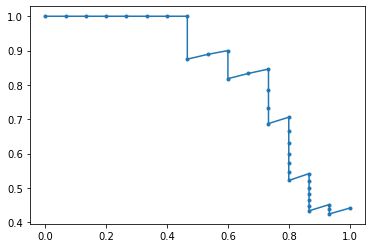

In [22]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(result, sim[0])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

Extract Feature From Q4

/content/Dataset_P1/Query/Q4.jpg
Ranking =  [[28 34 47 36  8 62  5 12 64  1 20 55 65 70 27 67 42 13 21 33 53 32 39 58
  15 46 61 35 63 49 16 14 25 22 71 44 19  9 68 43 54 66  6  3 74 52 69 41
  56 57 59 60 72  0 50  2  4  7 10 11 17 18 23 51 24 29 30 31 73 38 40 45
  48 26 37]]
0.020181453
index = 0 ID = 28
index = 1 ID = 34
index = 2 ID = 47
index = 3 ID = 36
index = 4 ID = 8
index = 5 ID = 62
index = 6 ID = 5
index = 7 ID = 12
index = 8 ID = 64
index = 9 ID = 1
index = 10 ID = 20
index = 11 ID = 55
index = 12 ID = 65
index = 13 ID = 70
index = 14 ID = 27


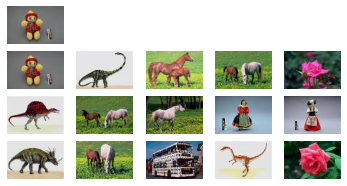

In [23]:
image_path = "/content/Dataset_P1/Query/Q4.jpg"
print (image_path)

# Load the classifier, class names, scaler, number of clusters and vocabulary 
im_features, image_paths, idf, numWords, voc = joblib.load("images.pkl")


des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(im, None)

des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1

# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])

# Visualize the results
figure()

subplot(5,5,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:15]):
     im = cv2.imread(image_paths[ID])
     print ("index =", i, "ID =",ID)
     img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     subplot(5,5,i+6)
     imshow(img)
     axis('off')
show()  


In [24]:
result=[]
for path in image_paths:
  if("443" in path):
    result.append(1)
  else:
    result.append(0)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(test_features, im_features)

In [26]:
sim

array([[0.        , 0.03379481, 0.        , 0.01117773, 0.        ,
        0.04670213, 0.0113061 , 0.        , 0.05995297, 0.01393838,
        0.        , 0.        , 0.04560333, 0.02974956, 0.01930746,
        0.02284898, 0.01934452, 0.        , 0.        , 0.01418723,
        0.03347941, 0.02931922, 0.01734927, 0.        , 0.        ,
        0.01895729, 0.        , 0.03045523, 1.0000001 , 0.        ,
        0.        , 0.        , 0.02607552, 0.02787529, 0.09466902,
        0.02223016, 0.07000086, 0.        , 0.        , 0.02548502,
        0.        , 0.0091105 , 0.03008581, 0.01255255, 0.01481646,
        0.        , 0.02267543, 0.07382181, 0.        , 0.02018146,
        0.        , 0.        , 0.0102133 , 0.02658857, 0.01253556,
        0.03198941, 0.        , 0.        , 0.02414271, 0.        ,
        0.        , 0.0224673 , 0.05046914, 0.02030253, 0.04190921,
        0.03104454, 0.01164378, 0.03010134, 0.01283884, 0.00998885,
        0.03066609, 0.01659604, 0.        , 0.  

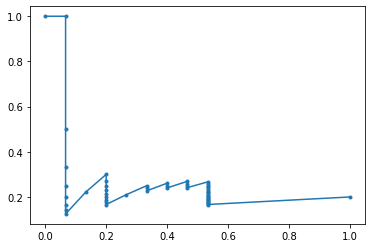

In [27]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(result, sim[0])
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')